In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full , y_test = train_test_split(housing.data,housing.target,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid + scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
x_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape=[8]),
    keras.layers.Dense(30,activation ="relu"),
    keras.layers.Dense(1)
])#keras.layer.Dense(30,activation = "relu,input_shape = x_train.shape[1:]")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error",optimizer = keras.optimizers.SGD(lr=1e-3),metrics = ['mae'] )
#lr-learning rate,mae-mean absolute error

C:\Users\LEGION\anaconda3\envs\santosh\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
 model_history = model.fit(x_train,y_train,epochs=20,validation_data= (x_valid ,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 878us/step - loss: 0.3949 - mae: 0.4489 - val_loss: 24557.4609 - val_mae: 140.2291
Epoch 2/20
363/363 [==============================] - 0s 861us/step - loss: 0.3922 - mae: 0.4469 - val_loss: 24328.7949 - val_mae: 139.5992
Epoch 3/20
363/363 [==============================] - 0s 857us/step - loss: 0.3898 - mae: 0.4461 - val_loss: 20166.1270 - val_mae: 128.4707
Epoch 4/20
363/363 [==============================] - 0s 862us/step - loss: 0.3873 - mae: 0.4439 - val_loss: 24368.7031 - val_mae: 139.7177
Epoch 5/20
363/363 [==============================] - 0s 852us/step - loss: 0.3851 - mae: 0.4426 - val_loss: 21692.6602 - val_mae: 132.7201
Epoch 6/20
363/363 [==============================] - 0s 847us/step - loss: 0.3829 - mae: 0.4415 - val_loss: 21258.1289 - val_mae: 131.6495
Epoch 7/20
363/363 [==============================] - 0s 843us/step - loss: 0.3808 - mae: 0.4398 - val_loss: 17140.3281 - val_mae: 119.9183
Epoch 8/20
363/363 [

In [17]:
 mae_test = model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 658us/step - loss: 0.3596 - mae: 0.4269


In [14]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [114923.9375,
  106103.46875,
  92774.546875,
  97678.75,
  82182.34375,
  80667.

AttributeError: 'AxesSubplot' object has no attribute 'set_yline'

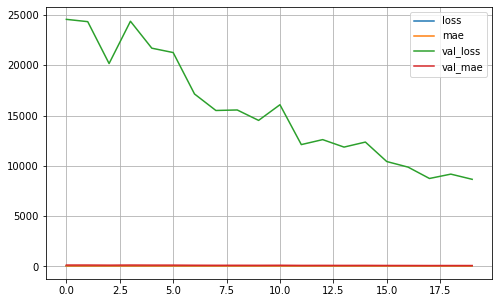

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_yline(0,1)
plt.show()

In [19]:
 x_new = x_test[:3]

In [22]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.60721976]
 [1.8602647 ]
 [3.792632  ]]
[0.477   0.458   5.00001]


In [23]:
del model

In [24]:
keras.backend.clear_session()

In [26]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_1[0][0]                

In [30]:
model.compile(loss = "mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

C:\Users\LEGION\anaconda3\envs\santosh\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [35]:
model_history = model.fit(x_train,y_train, epochs=40,validation_data=(x_valid,y_valid))

Epoch 1/40
363/363 [==============================] - ETA: 0s - loss: 0.3689 - mae: 0.433 - 0s 988us/step - loss: 0.3709 - mae: 0.4335 - val_loss: 32263.1191 - val_mae: 166.2963
Epoch 2/40
363/363 [==============================] - 0s 986us/step - loss: 0.3701 - mae: 0.4326 - val_loss: 32720.3262 - val_mae: 167.1074
Epoch 3/40
363/363 [==============================] - 0s 870us/step - loss: 0.3692 - mae: 0.4328 - val_loss: 29851.8359 - val_mae: 160.1971
Epoch 4/40
363/363 [==============================] - 0s 872us/step - loss: 0.3680 - mae: 0.4315 - val_loss: 33552.9883 - val_mae: 168.7819
Epoch 5/40
363/363 [==============================] - 0s 909us/step - loss: 0.3676 - mae: 0.4310 - val_loss: 32422.5586 - val_mae: 166.1720
Epoch 6/40
363/363 [==============================] - 0s 864us/step - loss: 0.3663 - mae: 0.4304 - val_loss: 34790.3086 - val_mae: 171.0281
Epoch 7/40
363/363 [==============================] - 0s 903us/step - loss: 0.3659 - mae: 0.4297 - val_loss: 30110.0137 - 

In [36]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 636us/step - loss: 0.3453 - mae: 0.4138


In [37]:
model_history.history

{'loss': [0.3709263205528259,
  0.3700839579105377,
  0.369223028421402,
  0.3680168092250824,
  0.36759650707244873,
  0.3662555515766144,
  0.3658841848373413,
  0.36490800976753235,
  0.3639836311340332,
  0.36330878734588623,
  0.36275675892829895,
  0.3617851436138153,
  0.3612557053565979,
  0.36040636897087097,
  0.3597029149532318,
  0.35897988080978394,
  0.3582959473133087,
  0.3581498861312866,
  0.357149213552475,
  0.35653623938560486,
  0.3560299873352051,
  0.3551877737045288,
  0.35484129190444946,
  0.35403120517730713,
  0.353405237197876,
  0.3530506491661072,
  0.3527590036392212,
  0.35197368264198303,
  0.3515776991844177,
  0.3507738709449768,
  0.350049763917923,
  0.34974566102027893,
  0.349582701921463,
  0.3487241268157959,
  0.34837576746940613,
  0.34780386090278625,
  0.34750786423683167,
  0.3469705879688263,
  0.34626635909080505,
  0.3456941843032837],
 'mae': [0.43353164196014404,
  0.4326022267341614,
  0.4328124523162842,
  0.43150049448013306,
  0.

AttributeError: 'AxesSubplot' object has no attribute 'set_yline'

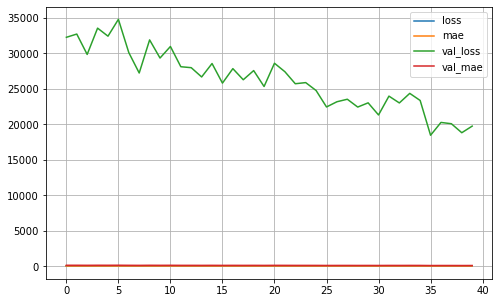

In [38]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_yline(0,1)
plt.show()

# Saving and Restoring 

In [39]:
model.save("my_func_model.h5")

In [40]:
%pwd

'C:\\Users\\LEGION'

In [41]:
%cd C:\\Users\\LEGION

C:\Users\LEGION


In [42]:
del model

In [43]:
keras.backend.clear_session()

In [44]:
model = keras.models.load_model("my_func_model.h5") 

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_1[0][0]                

In [46]:
y_pred = model.predict(x_new)
print(y_pred)

[[0.71041065]
 [1.6733272 ]
 [4.16231   ]]
